# 1. Acknowledgment 



At the very beginning, I would like to acknowledge the dataset contributor for his efforts to get the data that can help us analyse the data. 

COVID-19 (SARS Cov-2) is a virus that targets the respiratory tract of vulnerable patients. According to WHO, this is the 14th worldwide pandemic and due to the nature of how global the world is today, this pandemic has been the most spread out in terms of infections with almost the entire world suffering. The pandemic has brought about huge economic worries for nations and even more so for the daily wage workers who are without any work now and need to depend upon goverment subsidies.

Not just for the daily wage workers, this virus has caused immense strain in many other fields such as the educational field, aviation field, markets, travel industry and many more.


With respect to the nature of virus, due to it's nature, it keeps cosntantly mutating hence, making the job of the virologists extremely challenging to come up with a virus. This ailment has also brough about a great deal of an opportunity for budding data sceince emthisiasts such as myself to understand how the virus effects some poeple more than the rest. Through this kernel, I would like to find a few insights such. Moreover, understanding the pre-conditions would also help us make a smarter decision whether we should go to the hospital or keep ourselves home quarantined and not overload the hospitals. Some patients need health care facility much more than others. Hence, we must be considerate while making such choices.


## Reminder

The data obtained is from the Mexican government and hence, the analysis is valid for Mexico or maybe North America. The pandemic stats and behaviours are extremely different for Asian countries when compared to North American or European countries owing to far lower case fatality rate for Asia.

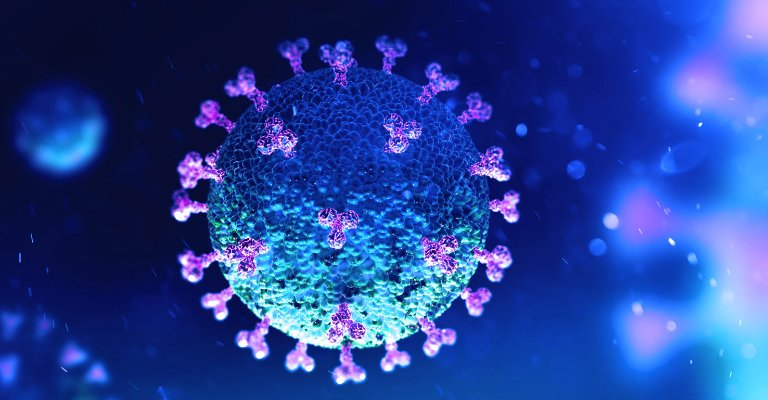

# 2. Importing relevant libraries and data

Let us import all the necessary libraries and the datasets we require for our data visualisations.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('Data/COVID.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


# 3. Data Cleaning

Since not all the data is always clean, we must take some effort to make the data more understandable and easier to plot. These steps would include things like idetifying null values, filling null values or dropping them, changing data type to required types.


Let us list down all the descriptors of the data to clearly understand what the entries mean.

## Data descriptors

### (a) Sex

1: Female

2: Male

### (b) Patient_type

1: Outpatient

2: Inpatient


### (c) Columns with details like pregnancy, diabetes,copd,asthma , etc.

1: Yes

2: No

Others (97,98,99) : Not available


Okay great ! Now that we have the available descriptors of each column, we can move forward with the cleaning of wrangling of the data.


Let us check the various data types we are dealing with first.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
id                     566602 non-null object
sex                    566602 non-null int64
patient_type           566602 non-null int64
entry_date             566602 non-null object
date_symptoms          566602 non-null object
date_died              566602 non-null object
intubed                566602 non-null int64
pneumonia              566602 non-null int64
age                    566602 non-null int64
pregnancy              566602 non-null int64
diabetes               566602 non-null int64
copd                   566602 non-null int64
asthma                 566602 non-null int64
inmsupr                566602 non-null int64
hypertension           566602 non-null int64
other_disease          566602 non-null int64
cardiovascular         566602 non-null int64
obesity                566602 non-null int64
renal_chronic          566602 non-null int64
tobacco                566602 

Judging from the above data, we can see that we have a data of 5,66,602 patients.

Most of the data is fine and requires no further wrangling other than the dates. Let us convert the date columns to a datetime datatype.

## Date columns

The columns we are interested are:

* entry_date
* date_symptoms
* date_died

In [4]:
date_fields=['entry_date','date_symptoms']
for dates in date_fields:
    df[dates]=pd.to_datetime(df[dates],infer_datetime_format=True)

However, the data for date_died is not straightforward. Since only a fraction of the cases are actually fatal, hence, the date_died column will have many entries with 9s. We shall replace these values with some other value such as Not applicable.

In [5]:
df['date_died'].replace('9999-99-99','Not Applicable',inplace=True)

## Other patient details

Let us check the other columns now. As we already know, entries such as 97,98,99 are codes for empty values. Hence, we shall replace these value with null values.

However we don't want to mess with the age values since ages could genuinely be 97,98 or 99.

Moreover, we don't have any use of id column. Hence, we can safely drop the id.

In [6]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [7]:
df=df[['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'age',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu']]

In [15]:
df.iloc[:,6:]=df.iloc[:,6:].replace([97,98,99],np.nan)

In [17]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,2020-04-05,2020-02-05,Not Applicable,27,NaN,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,NaN
1,2,1,2020-03-19,2020-03-17,Not Applicable,24,NaN,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,NaN
2,1,2,2020-06-04,2020-01-04,Not Applicable,54,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1,2.0
3,2,2,2020-04-17,2020-10-04,Not Applicable,30,2.0,1.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1,2.0
4,1,2,2020-04-13,2020-04-13,22-04-2020,60,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,NaN,1,2.0


As we can see, the data has now been properly cleaned. All values with 97,98,99 have been replaced by null values. Let us check the number of null values for each feature.

Text(0.5, 1.0, 'Null value heatmap')

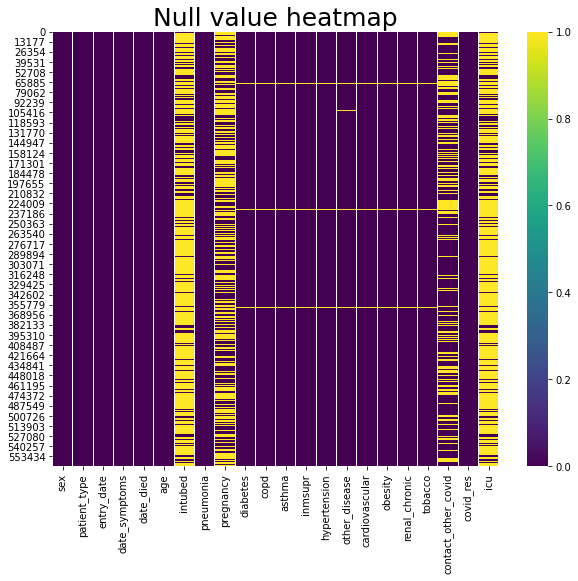

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis')
plt.title('Null value heatmap',size=25)

From the above heatmap, high number of null values can bee seen in intubed, pregnancy , ICU and contact_other_covid features. Rest of the values don't seem to have much.